In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import returnbyfactors

In [2]:
data = pd.read_csv(r'/home/ibrahim/Desktop/internship_project/data/Price.csv',index_col='Unnamed: 0')
data.head()

/home/ibrahim/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,symbol,adjusted_close,date
0,LKMNH,6.45,2018-03-14
1,SUMAS,4.78,2018-03-15
2,ACSEL,2.69,2018-03-16
3,FROTO,62.70,2018-03-19
4,LKMNH,6.54,2018-03-20


In [3]:
pivotdata = data.pivot_table(values='adjusted_close',index='date',columns='symbol')
pivotdata.index = pd.to_datetime(pivotdata.index)

In [4]:
pivotdata = pivotdata['2000-01-01':]

In [5]:
returns = pivotdata.pct_change()

In [6]:
scores = returns.rolling(window=250,min_periods=220).std().dropna(thresh=15,axis=0).dropna(how='all',axis=1)

In [7]:
factor_scores = returnbyfactors.analyze_by_score(pivotdata,scores,nofgroups=5,return_range=[5,10,15])

In [8]:
factor_scores

,5dayreturn,10dayreturn,15dayreturn
index,,,
Group1,-0.003477,-0.003046,-0.003115
Group2,0.000879,0.001342,0.001430
Group3,0.001848,0.002476,0.002662
Group4,0.000737,0.001308,0.001514
Group5,0.000013,-0.002080,-0.002491


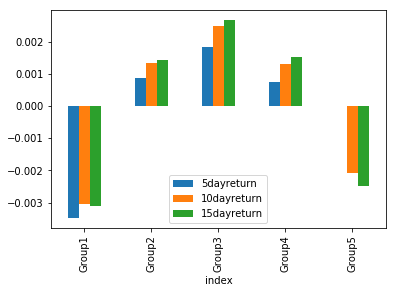

In [9]:
factor_scores.plot(kind='bar')